In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

db = pymysql.connect(host="localhost", user="rnv_importer", password="rnv_importer", database="rnv_big_data_mining")
cursor = db.cursor()

<Figure size 1000x600 with 0 Axes>

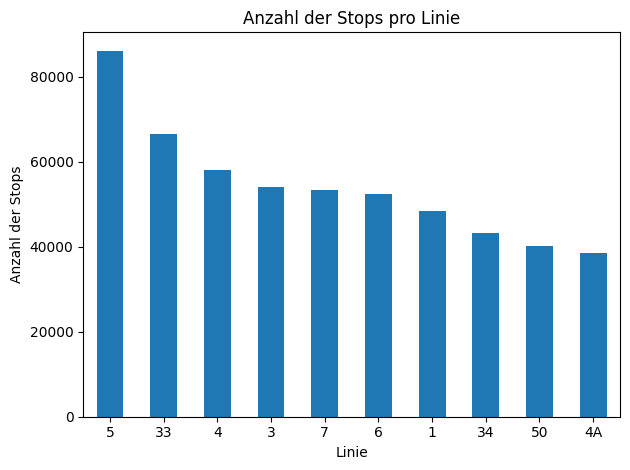

In [29]:
cursor.execute("SELECT `lines`.linegroup, COUNT(*) number_stops FROM stops JOIN `lines` ON stops.api_line = `lines`.id GROUP BY `lines`.linegroup ORDER BY number_stops DESC LIMIT 10;")
topStationStops = cursor.fetchall()


# Ergebnisse in einen DataFrame umwandeln
df = pd.DataFrame(topStationStops, columns=['linegroup', 'number_stops'])

# Diagramm erstellen
plt.figure(figsize=(10, 6))
ax = df.plot(kind="bar", x='linegroup', y='number_stops', rot=45, align='center', legend=False)
plt.xlabel('Linie')
plt.ylabel('Anzahl der Stops')
plt.title('Anzahl der Stops pro Linie')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

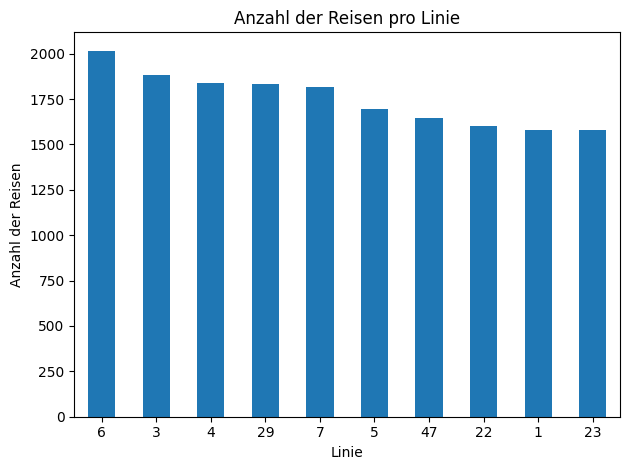

In [30]:
cursor.execute("SELECT `lines`.linegroup, COUNT(*) number_journeys FROM journeys JOIN `lines` ON journeys.api_line = `lines`.id GROUP BY `lines`.linegroup ORDER BY number_journeys DESC LIMIT 10;")
topStationStops = cursor.fetchall()


# Ergebnisse in einen DataFrame umwandeln
df = pd.DataFrame(topStationStops, columns=['linegroup', 'number_journeys'])

# Diagramm erstellen
plt.figure(figsize=(10, 6))
ax = df.plot(kind="bar", x='linegroup', y='number_journeys', rot=45, align='center', legend=False)
plt.xlabel('Linie')
plt.ylabel('Anzahl der Reisen')
plt.title('Anzahl der Reisen pro Linie')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

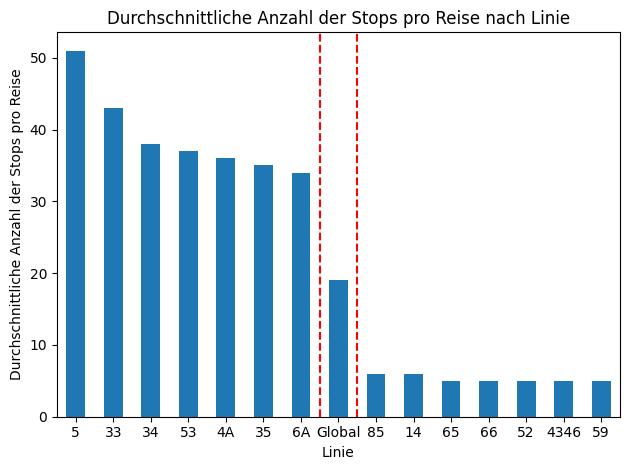

In [9]:
cursor.execute("SELECT stops.linegroup, ROUND(stops.number_stops / journeys.number_journeys) AS avg_stops_per_journey FROM (SELECT `lines`.linegroup AS linegroup, COUNT(*) AS number_stops FROM stops JOIN `lines` ON stops.api_line = `lines`.id GROUP BY linegroup) AS stops JOIN (SELECT `lines`.linegroup AS linegroup, COUNT(*) AS number_journeys FROM journeys JOIN `lines` ON journeys.api_line = `lines`.id GROUP BY linegroup) AS journeys ON stops.linegroup = journeys.linegroup ORDER BY avg_stops_per_journey DESC;")
topStationStops = cursor.fetchall()

cursor.execute("SELECT ROUND(COUNT(*) / (SELECT COUNT(*) FROM journeys)) AS global_avg_stops_per_journey FROM stops;")
global_avg_stops_per_journey = cursor.fetchone()[0]


# Ergebnisse in einen DataFrame umwandeln
df = pd.DataFrame(topStationStops, columns=['linegroup', 'avg_stops_per_journey'])

df = pd.concat([pd.DataFrame([['Global', global_avg_stops_per_journey]], columns=df.columns), df], ignore_index=True)

# Konvertieren Sie die Daten in der Spalte 'avg_stops_per_journey' in numerische Werte
df['avg_stops_per_journey'] = pd.to_numeric(df['avg_stops_per_journey'], errors='coerce')



# Wählen Sie die oberen 7 und unteren 7 Zeilen aus
top_5 = df.head(8)
bottom_5 = df.tail(7)



# Kombinieren Sie die beiden DataFrames
combined = pd.concat([top_5, bottom_5]).sort_values(by='avg_stops_per_journey', ascending=False)

# Diagramm erstellen
plt.figure(figsize=(10, 6))
ax = combined.plot(kind="bar", x='linegroup', y='avg_stops_per_journey', rot=45, align='center', legend=False)
plt.xlabel('Linie')
plt.ylabel('Durchschnittliche Anzahl der Stops pro Reise')
plt.title('Durchschnittliche Anzahl der Stops pro Reise nach Linie')

# Zeichnen Sie eine vertikale Linie zwischen den unteren 7 und oberen 7 Zeilen
plt.axvline(6.5, color='red', linestyle='--')
plt.axvline(7.5, color='red', linestyle='--')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()